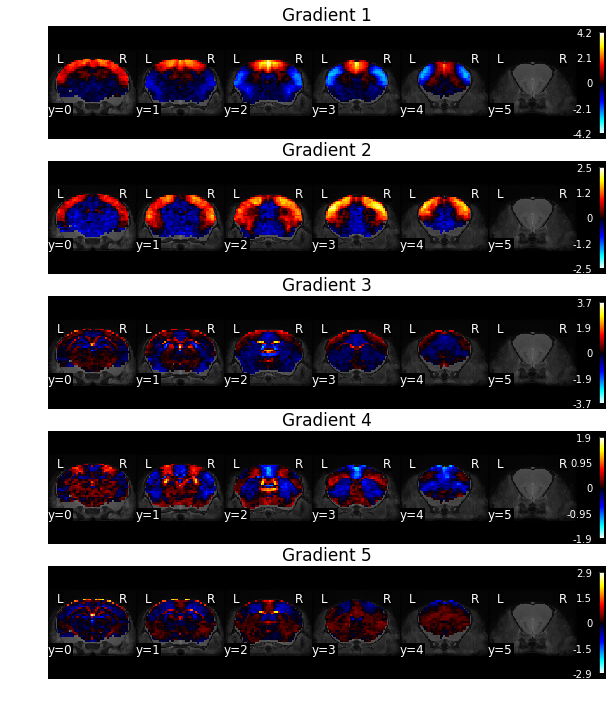

In [5]:
from nilearn.plotting import plot_stat_map
%matplotlib inline
#components=np.load('data/temp_components.npy')
reduced_matrix=np.load('data/reduced_matrix.npy')
components=reduced_matrix[:,:5].T

mask_file='final_mask.nii.gz'
mask=np.asarray(nb.load(mask_file).dataobj)
shape=mask.shape
mask_vector=mask.reshape(-1)
mask_indices=(mask_vector==True)

fig,[ax1,ax2,ax3,ax4,ax5] = plt.subplots(nrows=5, ncols=1,figsize=(10,12))
for i,ax in zip([0,1,2,3,4],[ax1,ax2,ax3,ax4,ax5]):
    component=components[i,:]
    mask_vector[mask_indices]=component
    gradient_array=mask_vector.reshape(shape)
    gradient_img=nb.Nifti1Image(gradient_array, nb.load(mask_file).affine, nb.load(mask_file).header)

    plot_stat_map(gradient_img,bg_img='DSURQE.nii.gz', axes=ax, threshold=0.0001, cut_coords=(0,1,2,3,4,5), display_mode='y')
    ax.set_title('Gradient %s' % (str(i+1)), fontsize=17)
